<a href="https://colab.research.google.com/github/saurabhashok/Bitcoin-price-prediction/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crypto Price prediction using Facebook Prophet

## Importing Necessary Libraries

In [114]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px

In [115]:
 #Initializing Plotly
 import  plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [116]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

INFO:oauth2client.client:Refreshing access_token


In [117]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1L-AtfzPbJBCsHoSG8O9Vkc-JKkH6hKE-IQvlxdHF0ho/edit#gid=0')

In [118]:
sheet = wb.worksheet('Bitcoin')

In [119]:
data = sheet.get_all_values()

In [120]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace = True)

To upload data from the local directory

In [121]:
df.head()

,Date,Close
1,01/01/2016,435.66
2,01/02/2016,435.4
3,01/03/2016,431.91
4,01/04/2016,433.85
5,01/05/2016,433.34


In [122]:
df.dtypes

0
Date     object
Close    object
dtype: object

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 1 to 1705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1705 non-null   object
 1   Close   1705 non-null   object
dtypes: object(2)
memory usage: 40.0+ KB


# Data Visualization 

In [124]:
# Area graph (Date Vs Price)
px.area(df,x='Date',y='Close')

In [125]:
# Violin plot
px.violin(df, y="Close")

# Creating Facebook Prophet Model

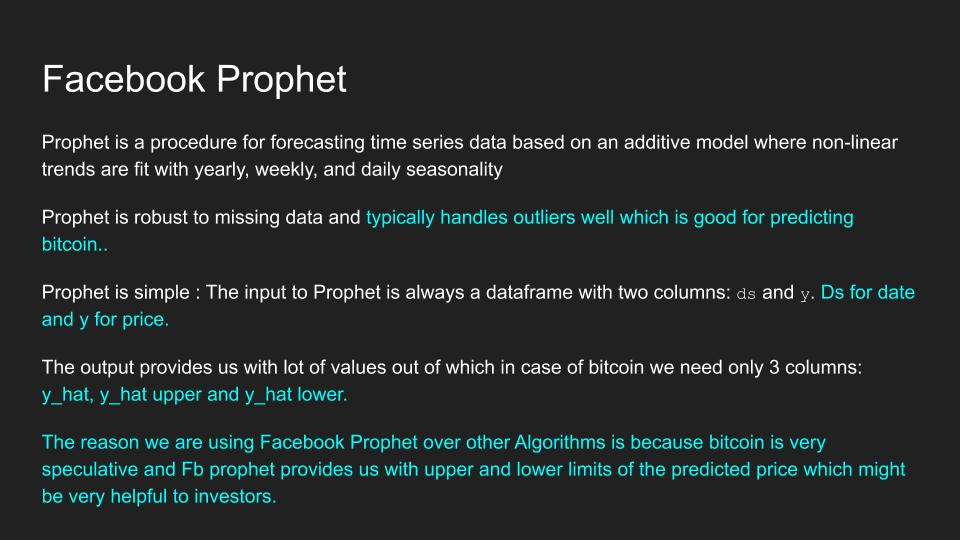

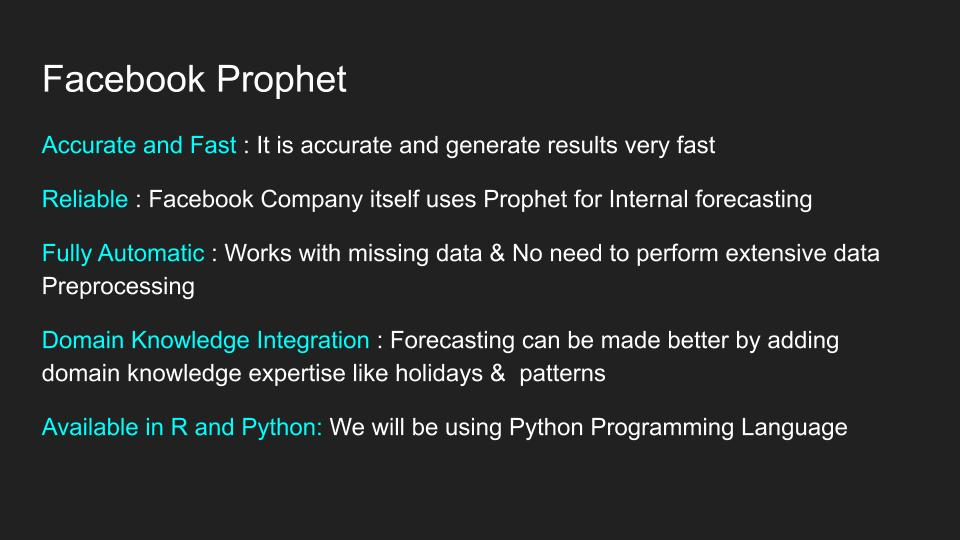

## Data Preperation

In [126]:
prophet_df = df.rename(columns={"Date":"ds", "Close":"y" })

In [127]:
prophet_df  

,ds,y
1,01/01/2016,435.66
2,01/02/2016,435.4
3,01/03/2016,431.91
4,01/04/2016,433.85
5,01/05/2016,433.34
...,...,...
1701,8/27/2020,11329.1
1702,8/28/2020,11535
1703,8/29/2020,11474.3
1704,8/30/2020,11716


## Modelling

In [128]:
m = Prophet()
m.fit(prophet_df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [129]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

##Forecasting

In [130]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1024.030928,-178.088665,2804.651767,1024.030928,1024.030928,367.408771,367.408771,367.408771,-3.507518,-3.507518,-3.507518,370.916288,370.916288,370.916288,0.0,0.0,0.0,1391.439699
1,2016-01-02,1020.292562,-33.272080,2711.065691,1020.292562,1020.292562,346.875581,346.875581,346.875581,15.230811,15.230811,15.230811,331.644769,331.644769,331.644769,0.0,0.0,0.0,1367.168143
2,2016-01-03,1016.554196,-17.846659,2712.699028,1016.554196,1016.554196,285.749738,285.749738,285.749738,-8.815516,-8.815516,-8.815516,294.565254,294.565254,294.565254,0.0,0.0,0.0,1302.303934
3,2016-01-04,1012.815830,-187.287666,2831.436680,1012.815830,1012.815830,278.664345,278.664345,278.664345,18.789796,18.789796,18.789796,259.874549,259.874549,259.874549,0.0,0.0,0.0,1291.480175
4,2016-01-05,1009.077464,-144.316093,2671.611717,1009.077464,1009.077464,223.224561,223.224561,223.224561,-4.414476,-4.414476,-4.414476,227.639038,227.639038,227.639038,0.0,0.0,0.0,1232.302026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9075.188181,7520.348166,10362.894891,9040.541030,9111.564114,-89.368894,-89.368894,-89.368894,15.230811,15.230811,15.230811,-104.599705,-104.599705,-104.599705,0.0,0.0,0.0,8985.819287
1731,2020-09-27,9075.741437,7533.950658,10417.496019,9038.286688,9119.586005,-151.230902,-151.230902,-151.230902,-8.815516,-8.815516,-8.815516,-142.415387,-142.415387,-142.415387,0.0,0.0,0.0,8924.510535
1732,2020-09-28,9076.294693,7496.022264,10338.888606,9036.090220,9125.580287,-161.199556,-161.199556,-161.199556,18.789796,18.789796,18.789796,-179.989353,-179.989353,-179.989353,0.0,0.0,0.0,8915.095136
1733,2020-09-29,9076.847948,7462.656347,10301.522298,9033.605717,9136.792748,-221.420979,-221.420979,-221.420979,-4.414476,-4.414476,-4.414476,-217.006503,-217.006503,-217.006503,0.0,0.0,0.0,8855.426969


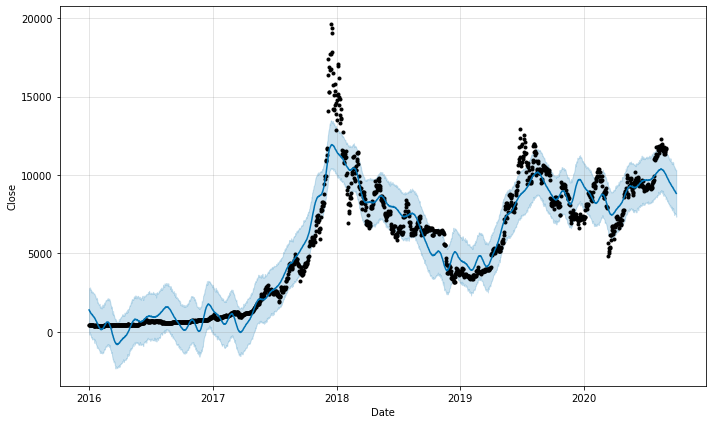

In [131]:
figure = m.plot(forecast, xlabel='Date', ylabel = 'Close')

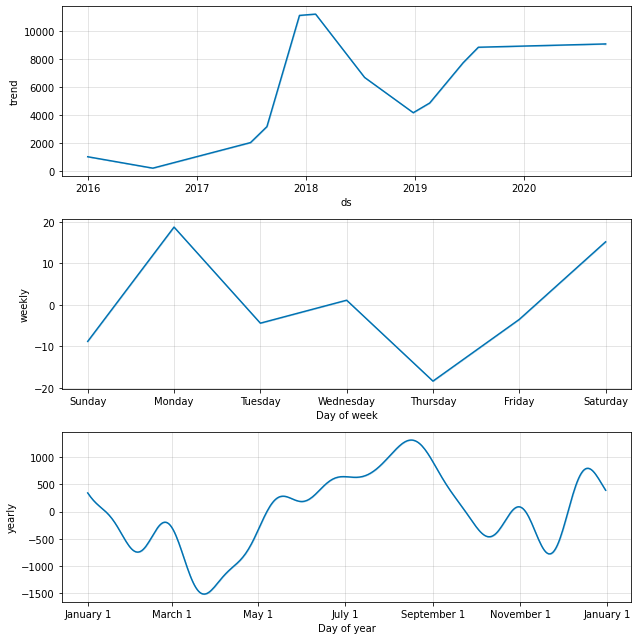

In [132]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [133]:
forecast.to_csv('forecast.csv')
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
sheet2 = wb.worksheet('Dogecoin')

In [135]:
data2 = sheet2.get_all_values()

In [136]:
dg = pd.DataFrame(data2)
dg.columns = dg.iloc[0]
dg.drop(dg.index[0], inplace=True)


In [137]:
columns = ["Date","Close"]
dg = dg[columns]

In [138]:
dg.head()

,Date,Close
1,10/01/2014,0.000371
2,10/02/2014,0.000334
3,10/03/2014,0.000326
4,10/04/2014,0.0003
5,10/05/2014,0.000273


In [139]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 1 to 2412
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2412 non-null   object
 1   Close   2412 non-null   object
dtypes: object(2)
memory usage: 56.5+ KB


In [140]:
dg.describe()

,Date,Close
count,2412,2412
unique,2412,1448
top,11/17/2018,0.000208
freq,1,17


In [141]:
px.area(dg, x="Date", y="Close")

In [142]:
px.violin(dg, y="Close")

In [143]:
prophet_dg = dg.rename(columns = {"Date":"ds", "Close":"y"})

In [145]:
n = Prophet()
n.fit(prophet_dg)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
future_doge = n.make_future_dataframe(periods=30)
forecast_doge = n.predict(future_doge)

In [147]:
forecast_doge

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,0.001343,-0.044849,0.038660,0.001343,0.001343,-0.003175,-0.003175,-0.003175,0.000043,0.000043,0.000043,-0.003218,-0.003218,-0.003218,0.0,0.0,0.0,-0.001832
1,2014-10-02,0.001336,-0.044368,0.041272,0.001336,0.001336,-0.003379,-0.003379,-0.003379,-0.000055,-0.000055,-0.000055,-0.003325,-0.003325,-0.003325,0.0,0.0,0.0,-0.002044
2,2014-10-03,0.001329,-0.043145,0.041450,0.001329,0.001329,-0.002511,-0.002511,-0.002511,0.000934,0.000934,0.000934,-0.003446,-0.003446,-0.003446,0.0,0.0,0.0,-0.001183
3,2014-10-04,0.001322,-0.045450,0.042145,0.001322,0.001322,-0.002753,-0.002753,-0.002753,0.000825,0.000825,0.000825,-0.003578,-0.003578,-0.003578,0.0,0.0,0.0,-0.001432
4,2014-10-05,0.001315,-0.047209,0.038222,0.001315,0.001315,-0.004573,-0.004573,-0.004573,-0.000856,-0.000856,-0.000856,-0.003717,-0.003717,-0.003717,0.0,0.0,0.0,-0.003258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2021-06-03,0.094291,0.047413,0.134887,0.094274,0.094310,-0.003638,-0.003638,-0.003638,-0.000055,-0.000055,-0.000055,-0.003583,-0.003583,-0.003583,0.0,0.0,0.0,0.090652
2435,2021-06-04,0.094513,0.051166,0.135385,0.094491,0.094537,-0.001900,-0.001900,-0.001900,0.000934,0.000934,0.000934,-0.002834,-0.002834,-0.002834,0.0,0.0,0.0,0.092613
2436,2021-06-05,0.094735,0.050344,0.139898,0.094704,0.094766,-0.001255,-0.001255,-0.001255,0.000825,0.000825,0.000825,-0.002079,-0.002079,-0.002079,0.0,0.0,0.0,0.093480
2437,2021-06-06,0.094957,0.045874,0.136440,0.094921,0.095000,-0.002200,-0.002200,-0.002200,-0.000856,-0.000856,-0.000856,-0.001344,-0.001344,-0.001344,0.0,0.0,0.0,0.092757


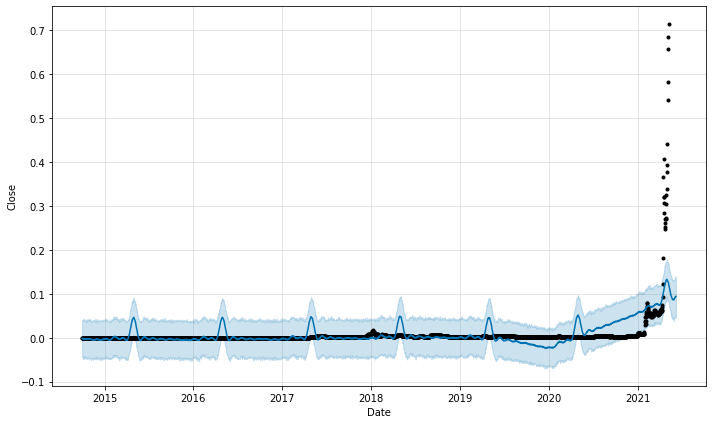

In [148]:
figure2 = n.plot(forecast_doge, xlabel='Date', ylabel = 'Close')

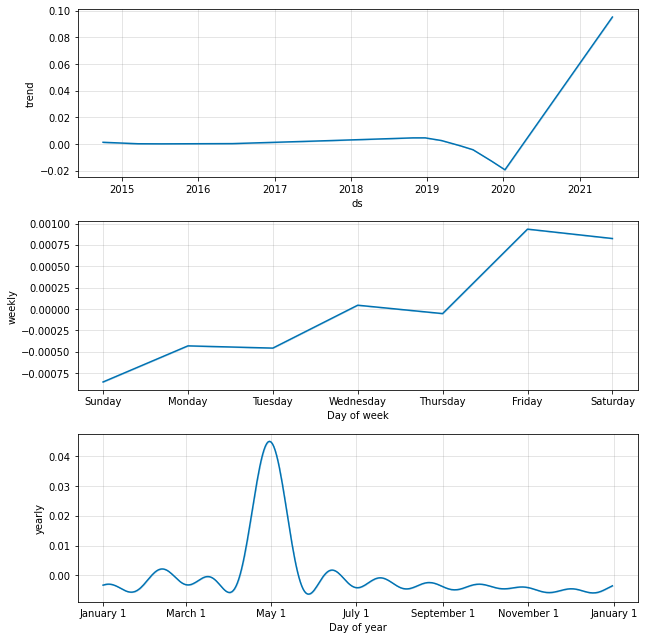

In [149]:
figure3 = n.plot_components(forecast_doge)